In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [3]:
rc('font',family='Comic Sans MS')

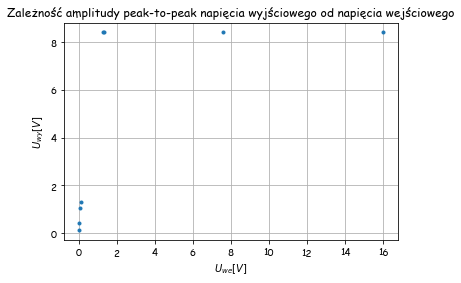

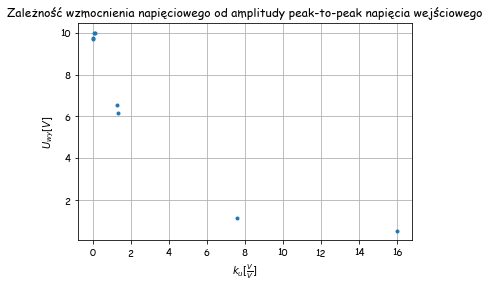

In [16]:
daneUodU = pd.read_csv('UodU.csv')
Uwe = daneUodU['Uwe[V]']
Uwy = daneUodU['Uwy[V]']
deltaUwe = Uwe*0.03
deltaUwy = Uwy*0.03
plt.plot(Uwe, Uwy,'.')
plt.title('Zależność amplitudy peak-to-peak napięcia wyjściowego od napięcia wejściowego')
plt.xlabel(r'$U_{we}[V]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('UodU.png')
plt.show()
k_u = Uwy/Uwe
plt.plot(Uwe, k_u,'.')
plt.title('Zależność wzmocnienia napięciowego od amplitudy peak-to-peak napięcia wejściowego')
plt.xlabel(r'$k_u[\frac{V}{V}]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('kodU.png')

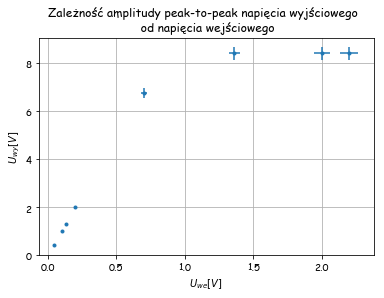

C:\Users\Paulina\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


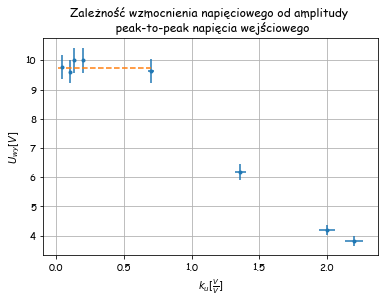

In [134]:
daneUodU = pd.read_csv('UodUmieszane.csv')
Uwe = daneUodU['Uwe[V]']
Uwy = daneUodU['Uwy[V]']
deltaUwe = Uwe*0.03
deltaUwy = Uwy*0.03
plt.errorbar(Uwe, Uwy,deltaUwy,deltaUwe,'.')
plt.title('Zależność amplitudy peak-to-peak napięcia wyjściowego  \n od napięcia wejściowego')
plt.xlabel(r'$U_{we}[V]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('UodU.png')
plt.show()
k_u = Uwy/Uwe
delta_k_u = np.sqrt((deltaUwy/Uwe)**2+(deltaUwe*Uwy/Uwe**2)**2)
plt.errorbar(Uwe, k_u,delta_k_u,deltaUwe,'.')
plt.title('Zależność wzmocnienia napięciowego od amplitudy \n peak-to-peak napięcia wejściowego')
plt.xlabel(r'$k_u[\frac{V}{V}]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
U_do_wykresu = np.linspace(0,0.7)
plt.plot(U_do_wykresu,U_do_wykresu/U_do_wykresu*9.75,'--')
# plt.savefig('kodU.png')

k_u = 9.79 +/- 0.045


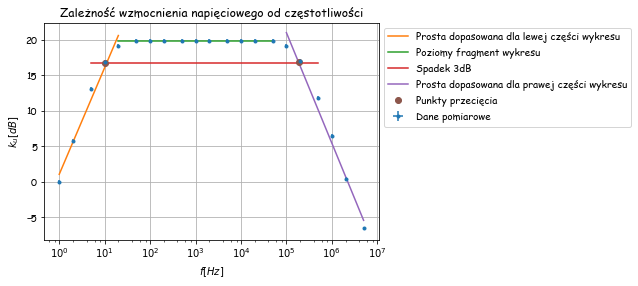

In [124]:
daneUodf = pd.read_csv('Uodf.csv')
f = daneUodf['f[kHz]']*1e3
Uwy = daneUodf['Uwy[V]']
# deltaf =
deltaUwy = Uwy*0.03
k_u = Uwy/200e-3
delta_k_u = deltaUwy/200e-3
k_u_wDecybelach= 20*np.log10(k_u)
delta_k_u_wDecybelach = 20*delta_k_u/np.log(10)/k_u
plt.errorbar(f, k_u_wDecybelach,delta_k_u_wDecybelach,0,'.',label='Dane pomiarowe')
plt.title('Zależność wzmocnienia napięciowego od częstotliwości')
plt.xlabel(r'$f[Hz]$')
plt.ylabel(r'$k_u[dB]$')
plt.grid()
plt.xscale('log')
prosta_rosnaca, cov_rosnaca = np.polyfit(np.log10(f[:5]),k_u_wDecybelach[:5],1,cov=True)
prosta_malejaca, cov_malejaca = np.polyfit(np.log10(f[-6:]),k_u_wDecybelach[-6:],1,cov=True)
plt.plot(f[:5],np.polyval(prosta_rosnaca,np.log10(f[:5])),label='Prosta dopasowana dla lewej części wykresu')
plt.plot(f[4:-6],f[4:-6]/f[4:-6]*19.78,label='Poziomy fragment wykresu')
plt.plot(f[2:-3],f[2:-3]/f[2:-3]*16.78,label='Spadek 3dB')
plt.plot(f[-6:],np.polyval(prosta_malejaca,np.log10(f[-6:])),label='Prosta dopasowana dla prawej części wykresu')
plt.plot([10,1.85e5],[16.75,16.83],'o',label='Punkty przecięcia')
leg = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig('kodf.png',bbox_extra_artists=(leg,), bbox_inches='tight')
daneUodf['\delta Uwy'] = deltaUwy
daneUodf['Wzmocnienie napięciowe'] = k_u_wDecybelach
daneUodf['\delta Wzmocnienie napięciowe'] = delta_k_u_wDecybelach
wzmocnienie, niepewneWzmocnienie = np.polyfit(f[5:-5],k_u[5:-5],1,cov=True)
print('k_u = {:.3} +/- {:.3}'.format(wzmocnienie[1],np.sqrt(niepewneWzmocnienie[1,1])))

In [130]:
8.42*0.012+0.04
377*0.008+3

6.016